<a href="https://colab.research.google.com/github/huiesoo/esaa/blob/main/24-1/0311.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHAPTER 4 모델 훈련

## 4.1 선형 회귀

In [37]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [38]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [39]:
theta_best

array([[3.75559968],
       [3.23113077]])

In [40]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.75559968],
       [10.21786122]])

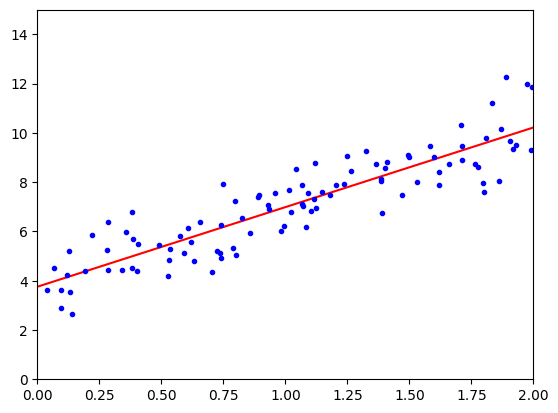

In [41]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [42]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [43]:
lin_reg.intercept_, lin_reg.coef_

(array([3.75559968]), array([[3.23113077]]))

In [44]:
lin_reg.predict(X_new)

array([[ 3.75559968],
       [10.21786122]])

In [45]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.75559968],
       [3.23113077]])

In [46]:
np.linalg.pinv(X_b).dot(y)

array([[3.75559968],
       [3.23113077]])

## 4.2 경사 하강법

In [47]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

In [48]:
theta

array([[3.75559968],
       [3.23113077]])

In [49]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

In [50]:
theta

array([[3.75612923],
       [3.2950739 ]])

In [51]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [52]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.72829425]), array([3.26933454]))

## 4.3 다항 회귀

In [53]:
m = 100
X = 6 * np.random.randn(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [54]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-3.40060374])

In [55]:
X_poly[0]

array([-3.40060374, 11.56410582])

In [56]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.85978943]), array([[0.9916918 , 0.50065715]]))

## 4.4 학습 곡선



*   학습 곡선
    
    훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기(또는 훈련 반복)의 함수로 나타낸 그래프

    훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러 번 훈련



In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="훈련 세트")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="검증 세트")

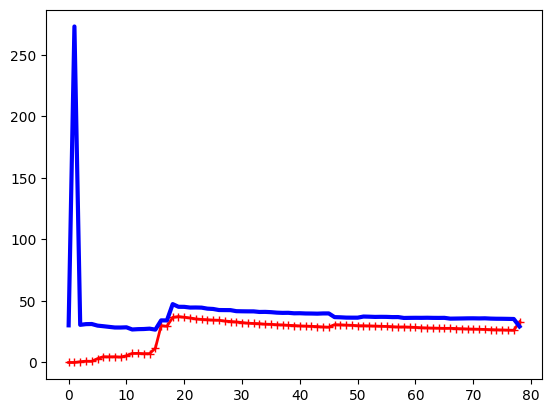

In [58]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)



*   과소적합

*   훈련 데이터의 성능

    그래프가 0에서 시작 -> 훈련 세트에 하나 혹은 두 개의 샘플이 있을 떈 모델이 완벽하게 작동

    훈련 세트에 샘플이 추가 -> 잡음, 비선형 -> 모델이 훈련 데이터를 완벽히 학습하는 것이 불가능

    곡선이 어느 정도 평편해질 때까지 오차가 계속 상승

    훈련 세트에 샘플이 추가되어도 평균 오차가 크게 나아지거나 나빠지지 않음

*   검증 데이터의 성능

    모델이 적은 수의 훈련 샘플로 훈련될 때는 제대로 일반화될 수 없음 -> 검증 오차가 초기에 매우 큼

    훈련 세트에 샘플이 추가 -> 학습, 검증 오차 천천히 감소

    선형 회귀의 직선은 데이터를 잘 모델링할 수 없으므로 오차의 감소가 완만해져서 훈련 세트의 그래프와 가까워짐

*   두 곡선이 수평한 구간을 만들고 꽤 높은 오파에서 매우 근접해 있음

*   모델이 훈련 데이터에 과소적합되어 있다면 훈련 샘플을 더 추가해도 효과 없음. 더 복잡한 모델을 사용하거나 더 나은 특성을 선택해야 함.



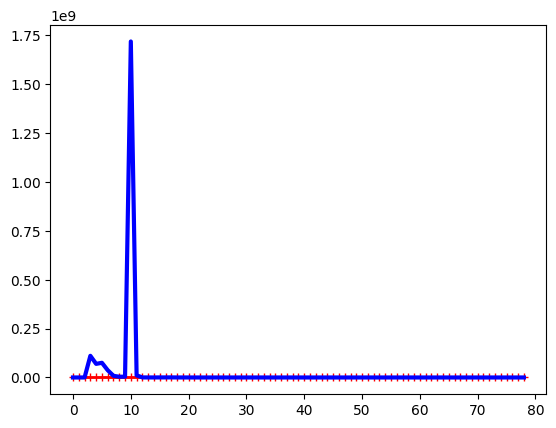

In [59]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)



*   차이점

    *   훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮음

    *   두 곡선 사이에 공간이 있음 = 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 나음 : 과대적합 모델의 특징

        더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워짐

*   과대적합을 개선하는 한 가지 방법 : 검증 오차가 훈련 오차에 근접할 때까지 더 많은 훈련 데이터를 추가





*   편향/분산 트레이드오프

    모델의 일반화 오차는 세 가지 다른 종류의 오차의 합으로 표현할 수 있음

    *   편향

        잘못된 가정으로 인한 것

        편향이 큰 모델은 훈련 데이터에 과소적합되기 쉬움

    *   분산

        훈련 데이터에 있는 작은 변동에 모델이 과도하게 민감하기 때문에 나타남

        자유도가 높은 모델이 높은 분산을 가지기 쉬워 훈련 데이터에 과대적합되는 경향이 있음

    *   줄일 수 없는 오차

        데이터 자체에 있는 잡음 때문에 발생

        이 오차를 줄일 수 있는 유일한 방법은 데이터에서 잡음을 제거하는 것

    모델의 복잡도 ↑ -> 분산 ↑, 편향 ↓

    모델의 복잡도 ↓ -> 분산 ↓, 편향 ↑

    => 트레이드오



## 4.5 규제가 있는 선형 모델

In [60]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[18.18237954]])

In [61]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([13.56428106])

In [62]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([18.19052787])

In [63]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([18.18946217])

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled,y_train.ravel())
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

## 4.6 로지스틱 회귀

In [66]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [68]:
X = iris["data"][:, 3:]
y=(iris["target"]==2).astype(int)

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

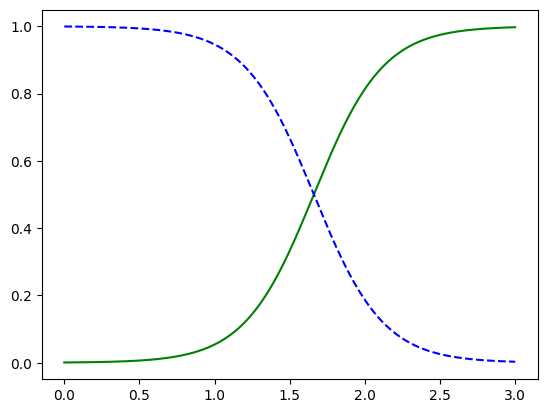

In [70]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")

In [71]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [75]:
X = iris["data"][:, (2, 3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [76]:
softmax_reg.predict([[5, 2]])

array([2])

In [77]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])